## Description:

    Hypothesis testing



# Setting variables

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(phyloseq)
library(ggplot2)
library(foreach)
library(doParallel)
library(gridExtra)
library(dplyr)
library(tidyr)
library(vegan)


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: iterators

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: parallel

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘

# Loading phyloseq object - rarified data

In [4]:
%%R
F = file.path('/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3_r')
physeq.Full = readRDS(F)
sd = sample_data(physeq.Full)
physeq.Full

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [5]:
%%R
colnames(sample_data(physeq.Full))

 [1] "X.sample"            "Library"             "Primer_Plate"       
 [4] "Primer_Well_ID"      "primerFR_ID_byPlate" "primerFR_ID_total"  
 [7] "barcode_ID"          "PlotID"              "Plant"              
[10] "Plot"                "Treatment"           "Rep"                
[13] "DAP"                 "Sampling"            "PlantSample"        
[16] "Type"                "Grass_Broad"         "Status"             
[19] "Subfamily"           "fwd_barcode"         "rev_barcode"        
[22] "Planted"             "Biomass_P"           "SLA"                
[25] "Leaf_N"              "Leaf_C"              "LeafC_N"            
[28] "LNa"                 "Plant_N"             "Plant_C"            
[31] "Plant_CN"            "d15N"                "tN_p"               
[34] "BX_activity_g"       "CB_activity_g"       "LAP_activity_g"     
[37] "NAG_activity_g"      "BX_rel"              "CB_rel"             
[40] "LAP_rel"             "NAG_rel"             "NO3_ug_g"           
[43] "

## Calculate pairwise weighted Unifrac distances between samples

In [6]:
%%R
registerDoParallel(cores=28)
wunif.dist = distance(physeq.Full, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

unif.dist = distance(physeq.Full, 
                      method = "unifrac", 
                      weighted = FALSE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

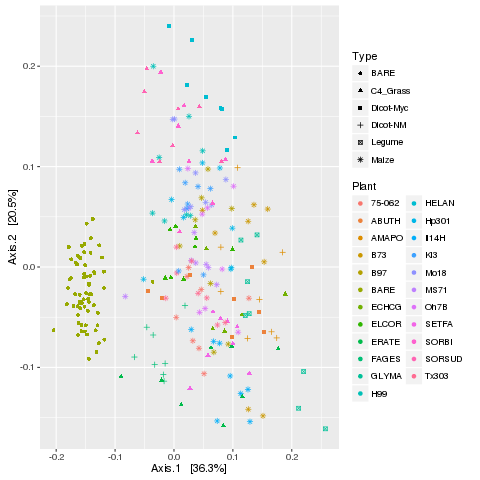

In [7]:
%%R
# Try PCoA 

ordu = ordinate(physeq.Full, "PCoA", "unifrac", weighted=TRUE)
plot_ordination(physeq.Full, ordu, color="Plant", shape="Type")

# p = plot_ordination(physeq.Full, pcoa_w, justDF = TRUE)
# p1 = ggplot(p, aes(x = Axis.1, y = Axis.2)) +
#         geom_point(aes(fill=Plant), pch = 21)
# p1

## NMDS of w-UniFrac and unweighted UniFrac

In [8]:
%%R -w 800 -h 350

sample_data(physeq.Full)$DAP = factor(sample_data(physeq.Full)$DAP)

sample_data(physeq.Full)$Rep = factor(sample_data(physeq.Full)$Rep)

nmds_w = ordinate(physeq.Full, 
                method = "NMDS", 
                distance = wunif.dist)

nmds_u = ordinate(physeq.Full, 
                method = "NMDS", 
                distance = unif.dist)


Run 0 stress 0.1356143 
Run 1 stress 0.1455347 
Run 2 stress 0.1424607 
Run 3 stress 0.1471591 
Run 4 stress 0.1466862 
Run 5 stress 0.1419694 
Run 6 stress 0.1549386 
Run 7 stress 0.1612476 
Run 8 stress 0.1539889 
Run 9 stress 0.1448466 
Run 10 stress 0.1548117 
Run 11 stress 0.1544666 
Run 12 stress 0.1969793 
Run 13 stress 0.1383968 
Run 14 stress 0.1765366 
Run 15 stress 0.1586874 
Run 16 stress 0.1407307 
Run 17 stress 0.1549762 
Run 18 stress 0.1632493 
Run 19 stress 0.138988 
Run 20 stress 0.1537307 
*** No convergence -- monoMDS stopping criteria:
    19: stress ratio > sratmax
     1: scale factor of the gradient < sfgrmin
Run 0 stress 0.1729147 
Run 1 stress 0.1956447 
Run 2 stress 0.1786866 
Run 3 stress 0.1962702 
Run 4 stress 0.1895891 
Run 5 stress 0.179006 
Run 6 stress 0.1811849 
Run 7 stress 0.1788098 
Run 8 stress 0.1883103 
Run 9 stress 0.1843761 
Run 10 stress 0.1812974 
Run 11 stress 0.1836821 
Run 12 stress 0.1821126 
Run 13 stress 0.1832359 
Run 14 stress 0.1810

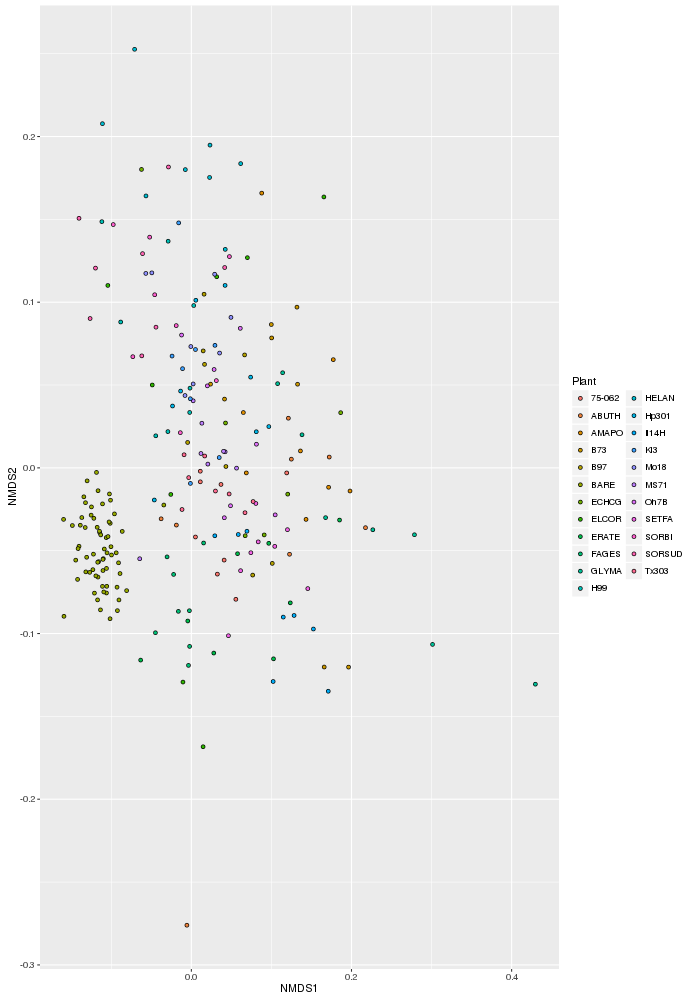

In [9]:
%%R -w 700 -h 1000
p = plot_ordination(physeq.Full, nmds_w, justDF = TRUE)
#p_u = plot_ordination(physeq.Full, nmds_u, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), pch = 21)
        #scale_size(range=c(2,8))
p1

#p2 = ggplot(p_u, aes(x = NMDS1, y = NMDS2)) +
 #       geom_point(aes(fill=Plant), pch=21) 
        #scale_size(range=c(2,8))

#grid.arrange(p1, p2, ncol=1)

Unweighted UniFrac results in much higher dispersion than weighted unifrac

### Weighted Unifrac figure

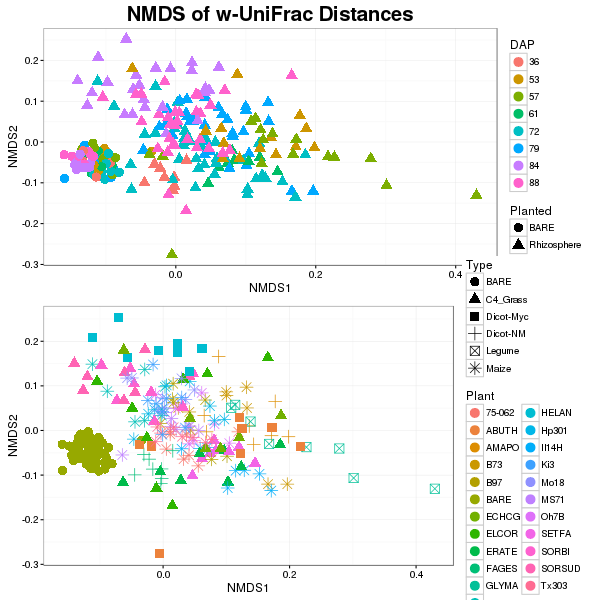

In [10]:
%%R -w 600 -h 600
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(pch = Planted, color=DAP), size = 4) + 
        ggtitle("NMDS of w-UniFrac Distances") +
        theme_bw() +
        theme(plot.title = element_text(face="bold", size=20)) +
        guides(fill=guide_legend(ncol=2))


p2 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(pch = Type, color=Plant), size = 4) + 
        #ggtitle("NMDS of w-UniFrac Distances") +
        theme_bw() +
        theme(plot.title = element_text(face="bold", size=20)) +
        guides(fill=guide_legend(ncol=2))


grid.arrange(p1, p2, ncol = 1)

In [11]:
%%R
##print to file
# pdf(file = "/home/bryan/RhizCG/figures/ordinations/NMDS_wunif_full.pdf", 
#     height = 6, width = 9)
# p1 %>% print
# dev.off()

NULL


## Facet NMDS by date

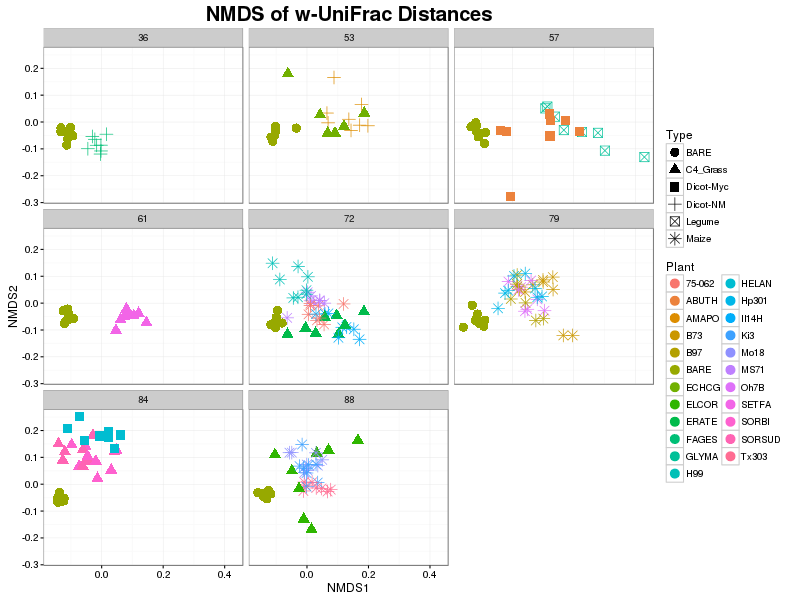

In [12]:
%%R -w 800 -h 600
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(pch = Type, color=Plant), size = 4) + 
        ggtitle("NMDS of w-UniFrac Distances") +
        theme_bw() +
        theme(plot.title = element_text(face="bold", size=20)) +
        guides(fill=guide_legend(ncol=2)) +
        facet_wrap(~DAP)
p1


In [13]:
%%R
set.seed(1)

df = as(sample_data(physeq.Full), "data.frame")
d = wunif.dist
Fulladonis = adonis(formula = d ~ Planted + DAP + Treatment + Plant, df, strata = df$Rep:df$Plant, permutations = 999)
Fulladonis


Call:
adonis(formula = d ~ Planted + DAP + Treatment + Plant, data = df,      permutations = 999, strata = df$Rep:df$Plant) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Planted     1    2.2437 2.24374 141.493 0.25414  0.001 ***
DAP         7    1.4651 0.20930  13.199 0.16595  0.003 ** 
Treatment   1    0.0421 0.04206   2.652 0.00476  0.001 ***
Plant      21    1.7952 0.08549   5.391 0.20334  0.026 *  
Residuals 207    3.2825 0.01586         0.37180           
Total     237    8.8287                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [18]:
%%R
set.seed(1)
phy = subset_samples(physeq.Full, !is.na(InorganicN))

#calculate distance matrix for subset
registerDoParallel(cores=28)
sub.wunif.dist = distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

#perform ADONIS
df = as(sample_data(phy), "data.frame")
d = sub.wunif.dist
Fulladonis = adonis(formula = d ~ InorganicN + Planted + DAP + Plant, df, strata = df$Rep:df$Plant, permutations = 999)
Fulladonis


Call:
adonis(formula = d ~ InorganicN + Planted + DAP + Plant, data = df,      permutations = 999, strata = df$Rep:df$Plant) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

            Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)  
InorganicN   1    0.1302 0.13020   8.287 0.02832  0.637  
Planted      1    1.5463 1.54633  98.413 0.33628  0.057 .
DAP          5    0.4604 0.09207   5.860 0.10012  0.278  
Plant       10    0.6544 0.06544   4.165 0.14232  0.099 .
Residuals  115    1.8070 0.01571         0.39296         
Total      132    4.5983                 1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Rhizosphere Ordination

In [20]:
%%R

physeq.plant = subset_samples(physeq.Full, Plant != "BARE")

#remove taxa that aren't in any plant samples
physeq.plant = filter_taxa(physeq.plant, function(x) max(x) > 0, TRUE)


In [21]:
%%R
sample_data(physeq.plant)$Plant %>% unique()

 [1] 75-062 Oh7B   SETFA  MS71   ERATE  FAGES  B73    AMAPO  B97    GLYMA 
[11] H99    Il14H  SORBI  SORSUD ELCOR  ABUTH  Ki3    HELAN  Tx303  Hp301 
[21] ECHCG  Mo18  
22 Levels: 75-062 ABUTH AMAPO B73 B97 ECHCG ELCOR ERATE FAGES GLYMA ... Tx303


In [22]:
%%R
registerDoParallel(cores=28)
plant.wunif.dist = distance(physeq.plant, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [23]:
%%R
df = as(sample_data(physeq.plant), "data.frame")
d = plant.wunif.dist
Plantadonis = adonis(formula = d ~ DAP + Plant + Treatment, df, strata = df$Rep:df$Plant, permutations = 999)
Plantadonis


Call:
adonis(formula = d ~ DAP + Plant + Treatment, data = df, permutations = 999,      strata = df$Rep:df$Plant) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
DAP         7    1.9678 0.281116 14.8741 0.32612  0.001 ***
Plant      14    1.1572 0.082657  4.3735 0.19178  0.001 ***
Treatment   1    0.0552 0.055211  2.9212 0.00915  0.001 ***
Residuals 151    2.8539 0.018900         0.47296           
Total     173    6.0341                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [28]:
%%R
phy = subset_samples(physeq.plant, !is.na(InorganicN))

#calculate distance matrix for subset
registerDoParallel(cores=28)
sub.wunif.dist = distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

#perform ADONIS
df = as(sample_data(phy), "data.frame")
d = sub.wunif.dist
Plantadonis = adonis(formula = d ~ InorganicN + DAP + Plant, df, strata = df$Rep:df$Plant, permutations = 999)
Plantadonis


Call:
adonis(formula = d ~ InorganicN + DAP + Plant, data = df, permutations = 999,      strata = df$Rep:df$Plant) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)  
InorganicN  1   0.08853 0.088528  4.4289 0.03415  0.024 *
DAP         5   0.71189 0.142379  7.1230 0.27465  0.742  
Plant       5   0.33245 0.066490  3.3264 0.12826  0.135  
Residuals  73   1.45916 0.019989         0.56294         
Total      84   2.59204                  1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [31]:
%%R
set.seed(63)
#perform ADONIS
df = as(sample_data(phy), "data.frame")
d = sub.wunif.dist
Plantadonis = adonis(formula = d ~ DAP + Plant + InorganicN, df, strata = df$Rep:df$Plant, permutations = 999)
Plantadonis


Call:
adonis(formula = d ~ DAP + Plant + InorganicN, data = df, permutations = 999,      strata = df$Rep:df$Plant) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)  
DAP         5   0.76737 0.153475  7.6781 0.29605  0.061 .
Plant       5   0.31325 0.062650  3.1343 0.12085  0.061 .
InorganicN  1   0.05225 0.052251  2.6140 0.02016  0.061 .
Residuals  73   1.45916 0.019989         0.56294         
Total      84   2.59204                  1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Calculate genotype effect on each date

#### DAP = 36 only one plant

#### DAP = 53

In [39]:
%%R

plant53 = subset_samples(physeq.plant, DAP == 53)

sample_data(plant53)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plant53.wunif.dist = distance(plant53, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plant53), "data.frame")
d = plant53.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "AMAPO" "ECHCG"

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)  
Plant      1  0.037986 0.037986  1.7814 0.12788  0.089 .
Treatment  1  0.024493 0.024493  1.1487 0.08246  0.357  
Residuals 11  0.234557 0.021323         0.78966         
Total     13  0.297035                  1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### DAP = 57

In [40]:
%%R
plantDay = subset_samples(physeq.plant, DAP == 57)

sample_data(plantDay)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "ABUTH" "GLYMA"

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Plant      1   0.09118 0.091184  3.0734 0.18053  0.001 ***
Treatment  1   0.02822 0.028221  0.9512 0.05587  0.409    
Residuals 13   0.38570 0.029669         0.76360           
Total     15   0.50510                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### DAP =  61; only one plant

#### DAP =  72

In [41]:
%%R
plantDay = subset_samples(physeq.plant, DAP == 72)

sample_data(plantDay)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "75-062" "ERATE"  "H99"    "Il14H"  "MS71"  

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Plant      4   0.31185 0.077963  5.2871 0.37418  0.001 ***
Treatment  1   0.02020 0.020204  1.3702 0.02424  0.162    
Residuals 34   0.50136 0.014746         0.60157           
Total     39   0.83342                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Day 79

In [42]:
%%R
plantDay = subset_samples(physeq.plant, DAP == 79)

sample_data(plantDay)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "B73"   "B97"   "Hp301" "Oh7B" 

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)   
Plant      3   0.08323 0.027743  1.6674 0.14862  0.003 **
Treatment  1   0.02754 0.027538  1.6551 0.04917  0.030 * 
Residuals 27   0.44923 0.016638         0.80220          
Total     31   0.56000                  1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Day 84

In [43]:
%%R
plantDay = subset_samples(physeq.plant, DAP == 84)

sample_data(plantDay)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "HELAN"  "SORBI"  "SORSUD"

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Plant      2   0.11001 0.055003  3.9650 0.26909  0.001 ***
Treatment  1   0.02137 0.021366  1.5402 0.05226  0.110    
Residuals 20   0.27744 0.013872         0.67865           
Total     23   0.40881                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Day 88

In [45]:
%%R
plantDay = subset_samples(physeq.plant, DAP == 88)

sample_data(plantDay)$Plant %>% levels() %>% print
sample_data(plantDay)$Library %>% unique() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "ELCOR" "Ki3"   "Mo18"  "Tx303"
[1] 2

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Plant      3   0.22839 0.076129  6.0517 0.38816  0.001 ***
Treatment  1   0.02034 0.020336  1.6166 0.03456  0.110    
Residuals 27   0.33966 0.012580         0.57727           
Total     31   0.58838                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Weighted UniFrac Faceted by Day

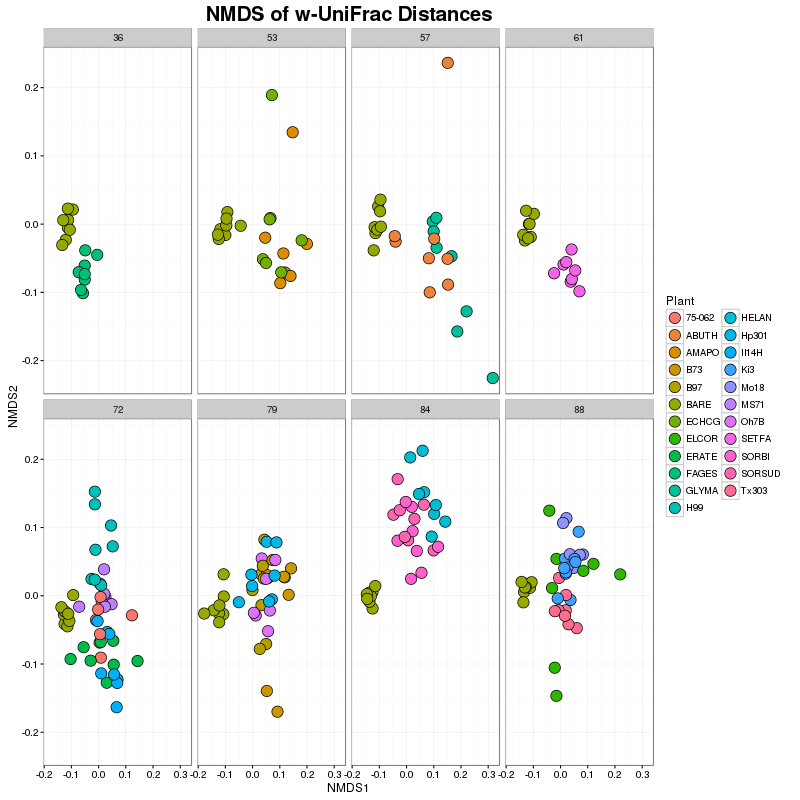

In [17]:
%%R -w 800 -h 800


## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 5, pch = 21) +
        facet_wrap(~ DAP, ncol = 4) +
        scale_size(range=c(2,8))+
        theme_bw() +
        ggtitle("NMDS of w-UniFrac Distances") +
        theme(plot.title = element_text(face="bold", size=20))

p1

In [ ]:
%%R
##print to file
pdf(file = "/home/bryan/RhizCG/figures/ordinations/NMDS_wunif_facetbyday.pdf", 
    height = 6, width = 9)
p1 %>% print
dev.off()

## CAP analysis of rhizosphere samples

[1] 72 79 61 36 53 57
Levels: 36 53 57 61 72 79


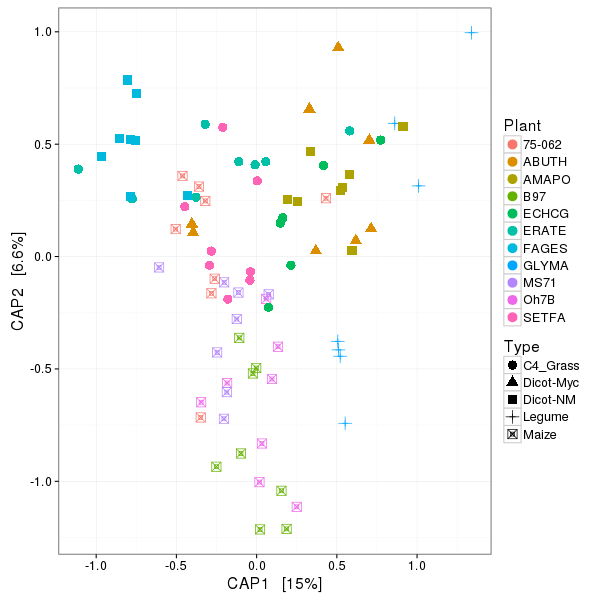

In [90]:
%%R -w 600 -h 600
phy = subset_samples(physeq.plant, !is.na(InorganicN))

phy.wunif.dist = distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

sample_data(phy)$DAP = as.factor(sample_data(phy)$DAP)
unique(sample_data(phy)$DAP) %>% print
# CAP ordinate
cap.ord = ordinate(
    physeq = phy, 
    method = "CAP",
    distance = phy.wunif.dist,
    formula = ~ CB_activity_g + LAP_activity_g
)

# CAP plot
cap.plot <- plot_ordination(
    phy, 
    cap.ord, 
    color = "Plant", 
    axes = c(1,2)
    ) + 
    aes(shape = Type) + 
    geom_point(aes(colour = Plant), 
        alpha= 1, 
        size = 4) + 
    #geom_point(colour = "grey90", 
    #    size = 1.5) + 
    theme_bw(base_size = 16)
    #scale_color_manual(values = c("#a65628", "red", "#ffae19", "#4daf4a", 
    #    "#1919ff", "darkorchid3", "magenta"))

cap.plot

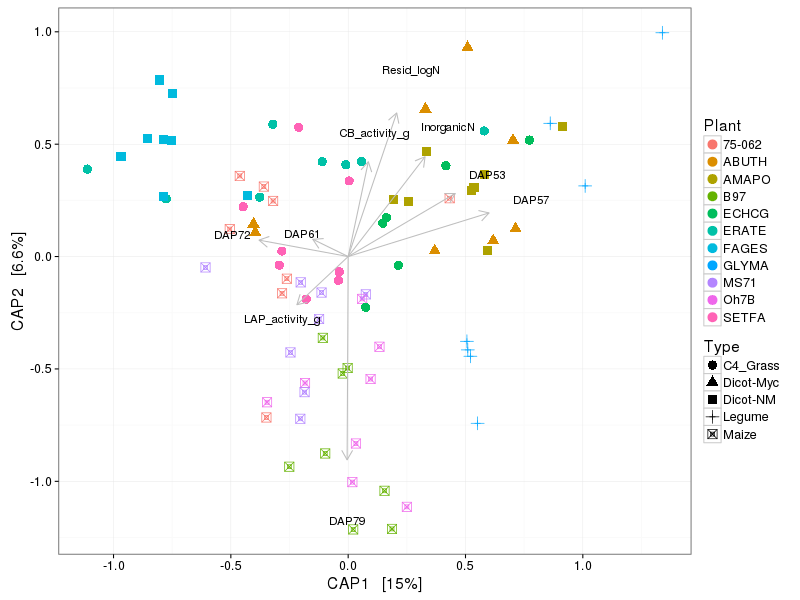

In [91]:
%%R -w 800 -h 600
# Now add the environmental variables as arrows
arrowmat <- vegan::scores(cap.ord, display = "bp")


# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)

# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = CAP2, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)

label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * CAP2, 
    shape = NULL, 
    color = NULL, 
    label = labels)

arrowhead = arrow(length = unit(0.02, "npc"))

# Make a new graphic
cap.plot + 
geom_segment(arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "gray", 
    arrow = arrowhead
    ) + 
geom_text(label_map, 
    size = 4,  
    data = arrowdf, 
    show_guide = FALSE)

In [93]:
%%R
summary(cap.ord)



Call:
capscale(formula = distance ~ DAP + InorganicN + CB_activity_g +      LAP_activity_g + Resid_logN, data = data) 

Partitioning of squared Unknown distance:
              Inertia Proportion
Total          2.2052     1.0000
Constrained    0.7172     0.3252
Unconstrained  1.4881     0.6748

Eigenvalues, and their contribution to the squared Unknown distance 

Importance of components:
                        CAP1   CAP2    CAP3    CAP4    CAP5    CAP6    CAP7
Eigenvalue            0.3303 0.1447 0.08948 0.04748 0.03871 0.02193 0.01707
Proportion Explained  0.1498 0.0656 0.04058 0.02153 0.01755 0.00995 0.00774
Cumulative Proportion 0.1498 0.2154 0.25597 0.27749 0.29505 0.30499 0.31274
                         CAP8    CAP9   MDS1    MDS2    MDS3    MDS4    MDS5
Eigenvalue            0.01532 0.01221 0.3130 0.20747 0.14053 0.08920 0.06924
Proportion Explained  0.00695 0.00554 0.1419 0.09408 0.06373 0.04045 0.03140
Cumulative Proportion 0.31968 0.32522 0.4672 0.56124 0.62497 0.66542 0.69

## Hypothesis testing of weighted and un-weighted unifrac

In [ ]:
%%R
df = as(sample_data(physeq.snorm), "data.frame")
d = wunif.dist
Fulladonis = adonis(formula = d ~ Library + Planted + DAP + Plant + Treatment, df, strata = df$Rep:df$Plant, permutations = 999)
Fulladonis

In [ ]:
%%R
a = data.frame(Fulladonis$aov.tab)
write.table(a, file = "/home/bryan/RhizCG/figures/FullADONIS.txt", sep = "\t")

In [ ]:
%%R
#Check model without Treatment effect only Nneg
df = as(sample_data(physeq.snorm.Nneg), "data.frame")
d = wunif.dist.Nneg
Nnegadonis = adonis(formula = d ~ Library + Planted + DAP + Plant, df, strata = df$Rep, permutations = 999)
Nnegadonis

In [ ]:
%%R
df = as(sample_data(physeq.snorm), "data.frame")
d = unif.dist
Fulladonis = adonis(formula = d ~ DAP +  Planted + Plant + Treatment + Rep, df, strata = df$Rep:df$Plant, permutations = 999)
Fulladonis

In [ ]:
%%R
df = as(sample_data(physeq.snorm.Nneg), "data.frame")
d = unif.dist.Nneg
Fulladonis = adonis(formula = d ~ DAP +  Planted + Plant + Rep, df, strata = df$Rep, permutations = 999)
Fulladonis

# Bare soils change with time w-UniFrac

In [ ]:
%%R

bare = subset_samples(physeq.snorm, Plant == "BARE")
sample_data(bare)$DAP = factor(sample_data(bare)$DAP)


In [ ]:
%%R
registerDoParallel(cores=28)
bare.wunif.dist = distance(bare, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [ ]:
%%R -w 800 -h 350


nmds = ordinate(bare, 
                method = "NMDS", 
               distance = bare.wunif.dist)

p = plot_ordination(bare, nmds, justDF = TRUE)

In [ ]:
%%R -w 750 -h 800


## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=DAP), size = 6, pch=21) 

p1

### Hypothesis Test adonis

In [ ]:
%%R
df = as(sample_data(bare), "data.frame")
d = bare.wunif.dist
bareadonis = adonis(d ~ DAP*Treatment + Rep, df, strata = df$Rep)
bareadonis

# Bare Soil Change with Time uw-UniFrac

In [ ]:
%%R
registerDoParallel(cores=28)
bare.unif.dist = distance(bare, 
                      method = "unifrac", 
                      weighted = FALSE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [ ]:
%%R -w 800 -h 350


nmds = ordinate(bare, 
                method = "NMDS", 
               distance = bare.unif.dist)

p = plot_ordination(bare, nmds, justDF = TRUE)

In [ ]:
%%R -w 800 -h 350


nmds = ordinate(bare, 
                method = "NMDS", 
               distance = bare.unif.dist)

p = plot_ordination(bare, nmds, justDF = TRUE)

In [ ]:
%%R -w 750 -h 800


## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=DAP), size = 6, pch=21) 

p1

### Hypothesis Test adonis

In [ ]:
%%R
df = as(sample_data(bare), "data.frame")
d = bare.unif.dist
bareadonis = adonis(d ~ DAP*Treatment + Rep, df, strata = df$Rep)
bareadonis

### subset just plants from Nneg and Npos

In [ ]:
%%R

plantNneg = subset_samples(plant, Treatment == "Nneg")
sample_data(plantNneg)$DAP = factor(sample_data(plantNneg)$DAP)
plantNneg %>% print
plantNpos = subset_samples(plant, Treatment == "Npos")
sample_data(plantNpos)$DAP = factor(sample_data(plantNpos)$DAP)
plantNpos %>% print

In [ ]:
%%R -w 750 -h 800
#Whole plant set

plantnmds = ordinate(plant, 
                method = "NMDS", 
               distance = plant.wunif.dist)

p = plot_ordination(plant, plantnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

In [ ]:
%%R -w 750 -h 800
#Whole plant set

plantNnegnmds = ordinate(plantNneg, 
                method = "NMDS", 
               distance = plantNneg.wunif.dist)

p = plot_ordination(plantNneg, plantNnegnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

In [ ]:
%%R -w 750 -h 800
#Whole plant set

plantNposnmds = ordinate(plantNpos, 
                method = "NMDS", 
               distance = plantNpos.wunif.dist)

p = plot_ordination(plantNpos, plantNposnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1


## subset for particular day to test significance of plant while controlling for date

### subset maize on a particular day

In [ ]:
%%R

plant72 = subset_samples(plantNneg, DAP == 72)
maize72 = subset_samples(plant72, Type == "Maize")
maize72
sample_data(maize72)$Plant %>% levels

In [ ]:
%%R
registerDoParallel(cores=28)
maize72.wunif.dist = distance(maize72, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [ ]:
%%R -w 750 -h 800
#Day 88

plantnmds = ordinate(maize72, 
                method = "NMDS", 
               distance = maize72.wunif.dist)

p = plot_ordination(maize72, plantnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

In [ ]:
%%R
df = as(sample_data(maize72), "data.frame")
d = maize72.wunif.dist
plantadonis = adonis(d ~ Plant, df, strata = df$Rep)
plantadonis

### Day 88

In [ ]:
%%R
plant88 = subset_samples(plantNneg, DAP == 88)
plant88

In [ ]:
%%R
registerDoParallel(cores=28)
plant88.wunif.dist = distance(plant88, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [ ]:
%%R -w 750 -h 800
#Day 88

plantnmds = ordinate(plant88, 
                method = "NMDS", 
               distance = plant88.wunif.dist)

p = plot_ordination(plant88, plantnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

## Significance test of plant effect on single day

In [ ]:
%%R
df = as(sample_data(plant88), "data.frame")
d = plant88.wunif.dist
plantadonis = adonis(d ~ Plant, df, strata = df$Rep)
plantadonis

### Maize on day 88

In [ ]:
%%R
maize88 = subset_samples(plant88, Type == "Maize")
maize88

In [ ]:
%%R
registerDoParallel(cores=28)
maize88.wunif.dist = distance(maize88, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [ ]:
%%R -w 750 -h 800
#Day 88

plantnmds = ordinate(maize88, 
                method = "NMDS", 
               distance = maize88.wunif.dist)

p = plot_ordination(maize88, plantnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

In [ ]:
%%R
df = as(sample_data(maize88), "data.frame")
d = maize88.wunif.dist
plantadonis = adonis(d ~ Plant, df, strata = df$Rep)
plantadonis

### maize on day

In [ ]:
%%R
sample_data(plantNneg)$DAP %>% levels

In [ ]:
%%R

plant79 = subset_samples(plantNneg, DAP == 79)
maize79 = subset_samples(plant79, Type == "Maize")
maize79
sample_data(maize79)$Plant %>% levels

In [ ]:
%%R
registerDoParallel(cores=28)
maize79.wunif.dist = distance(maize79, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [ ]:
%%R -w 750 -h 800
#Day 88

plantnmds = ordinate(maize79, 
                method = "NMDS", 
               distance = maize79.wunif.dist)

p = plot_ordination(maize79, plantnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

In [ ]:
%%R
df = as(sample_data(maize79), "data.frame")
d = maize79.wunif.dist
plantadonis = adonis(d ~ Plant, df, strata = df$Rep)
plantadonis